In [1]:
import pandas as pd
import numpy as np

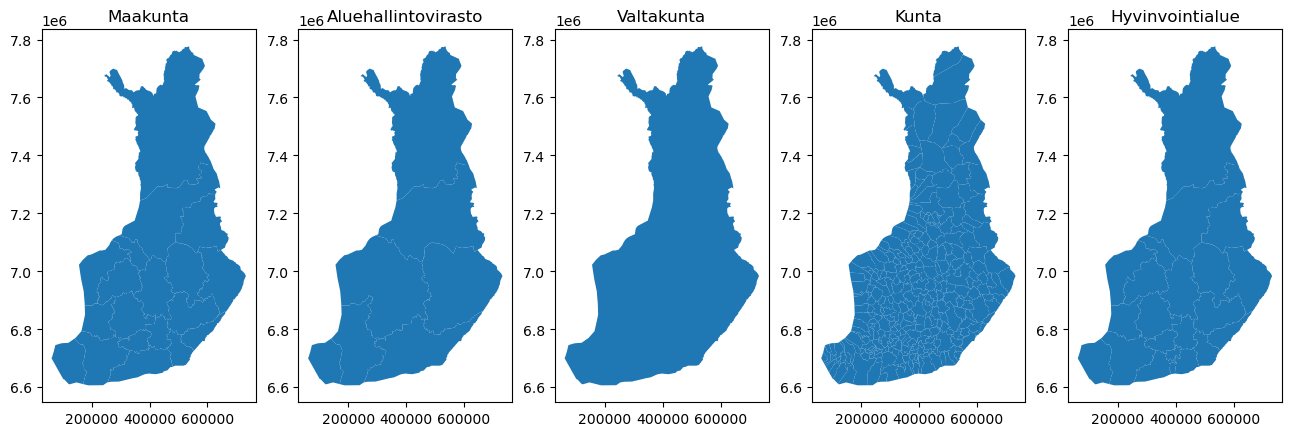

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 5, figsize=(16,16))

for i, layer in enumerate(['Maakunta', 'Aluehallintovirasto', 'Valtakunta', 'Kunta', 'Hyvinvointialue']):
    data = gpd.read_file('./data/geodata.gpkg', layer=layer)
    ax = axes[i]
    data.plot(ax=ax)
    ax.title.set_text(layer)
kunnat = gpd.read_file('./data/geodata.gpkg', layer='Maakunta')

In [3]:
values = pd.DataFrame()
values['regions'] = kunnat['namefin'].tolist()
values['e/ICE'] = np.arange(0, 1, 1/19, dtype = float).tolist()

In [4]:
regions = pd.read_csv('data/regions.csv', sep=";")
regions = regions.drop(columns=['distributionSourceToTarget','distributionTargetToSource','Unnamed: 6'])
regions = regions.rename(columns = {'sourceCode': 'municipality'})
regions['municipality'] = regions['municipality'].str.strip('\'')

In [5]:
df = pd.read_parquet('./data//visuals/vehicle_data.parquet')
df = df[df['vehicle_classification'] == 'M1']

In [6]:
df.loc[:, 'reg_year'] = pd.to_datetime(df.loc[:,'date_of_first_registration']).dt.year
df['reg_year'] = df['reg_year'].fillna(0)
df['reg_year'] = df['reg_year'].astype(int)
df = df[df.reg_year != 0]
df = df[df['reg_year'] > 2011]

In [7]:
df = df.join(regions.set_index('municipality'), on='municipality', lsuffix='_left', rsuffix='_right')

In [8]:
dfe = df[df['drive_power'] == '04']
ecars = np.array(dfe['targetName'].value_counts().sort_index().tolist())
dfice = df[df['drive_power'] != '04']
icecars = np.array(dfice['targetName'].value_counts().sort_index().tolist())
totals = (ecars + icecars)

In [9]:
proportions = pd.Series(ecars / totals).sort_index()

In [10]:
kunnat = kunnat.sort_values(by='namefin')
kunnat = kunnat.reset_index(drop=True)

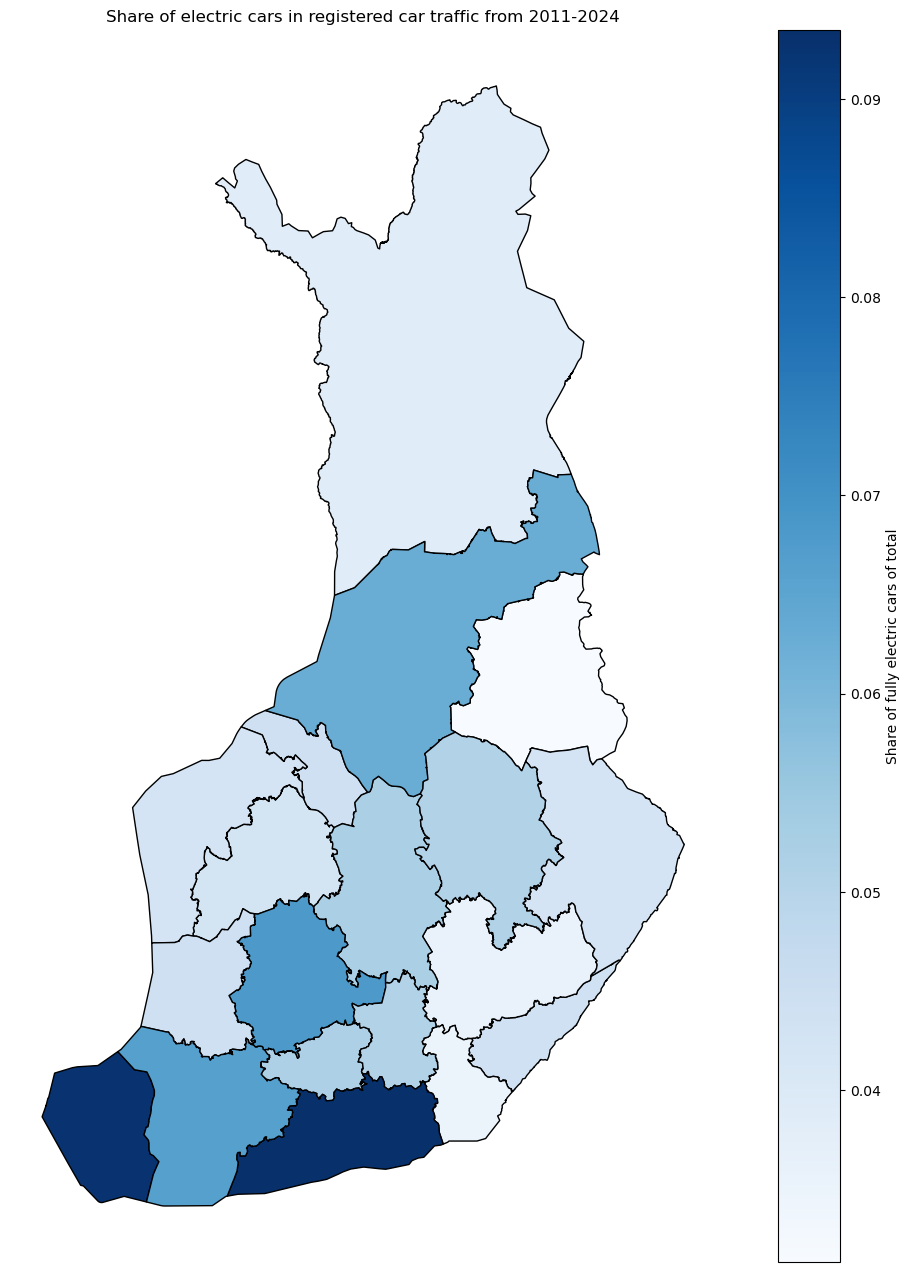

In [30]:
fig, ax = plt.subplots(1, figsize=(16, 16))
kunnat.plot(ax=ax,
            edgecolor = 'black',
            column = proportions,
            cmap = 'Blues',
            legend=True,
            legend_kwds={"label": "Share of fully electric cars of total"},
           )
plt.axis('off')
ax.title.set_text('Share of electric cars in registered car traffic from 2011-2024')

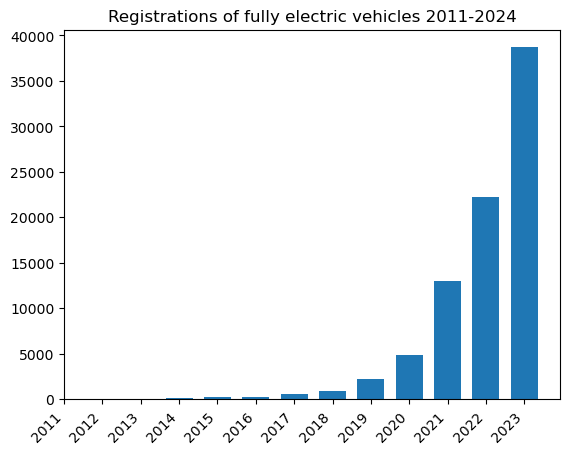

In [46]:
y = list(range(2011, 2024))
plot = df['reg_year'][df['drive_power'] == '04'].plot(kind='hist',
                                                      title="Registrations of fully electric vehicles 2011-2024",
                                                      ylabel = '',
                                                     histtype='bar',
                                                      rwidth=0.7,
                                                     bins = np.array(y) + 0.5
                                                     )
plt.xticks(y)
plt.xticks(rotation=45, ha='right')
plt.show()